In [1]:
import pandas as pd 
from datetime import datetimel

ImportError: cannot import name 'datetimel' from 'datetime' (C:\Users\sweth\anaconda3\lib\datetime.py)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d')

In [ ]:
df=pd.read_csv('WaterProductionAcrosPhoenix.csv',parse_dates=[['Year' ,'Month' ,'Day']],date_parser=convert_to_date ,keep_date_col=True)

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

In [124]:
df.drop(columns=df.columns[1] ,inplace=True)

In [125]:
df.drop(columns=['Year','Month' ,'Day'],inplace=True)

In [126]:
df.set_index('Year_Month_Day' ,inplace=True)

In [127]:
df

,Millions of Gallons
Year_Month_Day,
2011-01-01,6145.24
2011-02-01,5591.28
2011-03-01,6888.04
2011-04-01,7834.14
2011-05-01,9577.58
...,...
2022-11-01,7166.50
2022-12-01,6500.82
2023-01-01,6775.50


<Axes: xlabel='Year_Month_Day'>

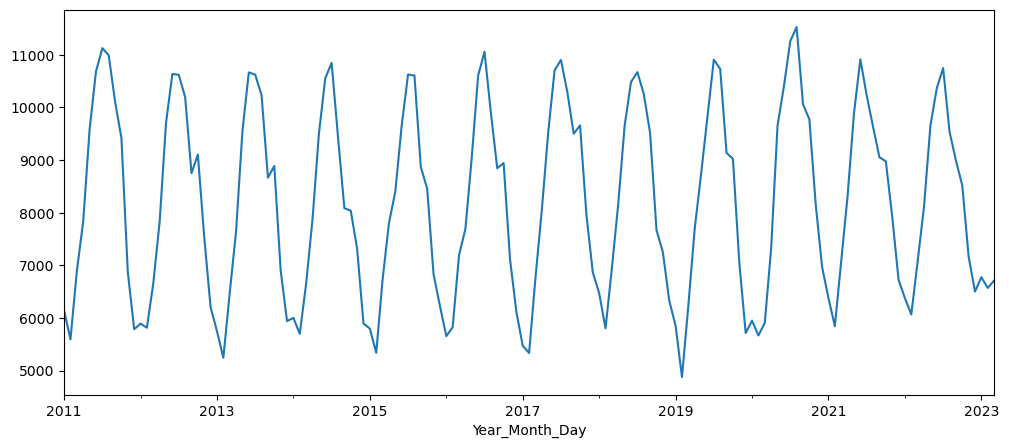

In [128]:
df['Millions of Gallons'].plot(figsize=(12,5))

In [131]:
fig = px.line(df, x= df.index, y='Millions of Gallons', title='Water Production in the city of Phoenix',markers=True)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [132]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [133]:
ad_test(df['Millions of Gallons'])

1. ADF :  -2.058905950527306
2. P-Value :  0.2613563751164444
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 134
5. Critical Values :
	 1% :  -3.480118600110386
	 5% :  -2.8833618426136196
	 10% :  -2.578407034974382


In [134]:
# This data is not stationary

In [135]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [136]:
adf_test(df['Millions of Gallons'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.058906
p-value                          0.261356
#Lags Used                      12.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [137]:
# data is not stationary

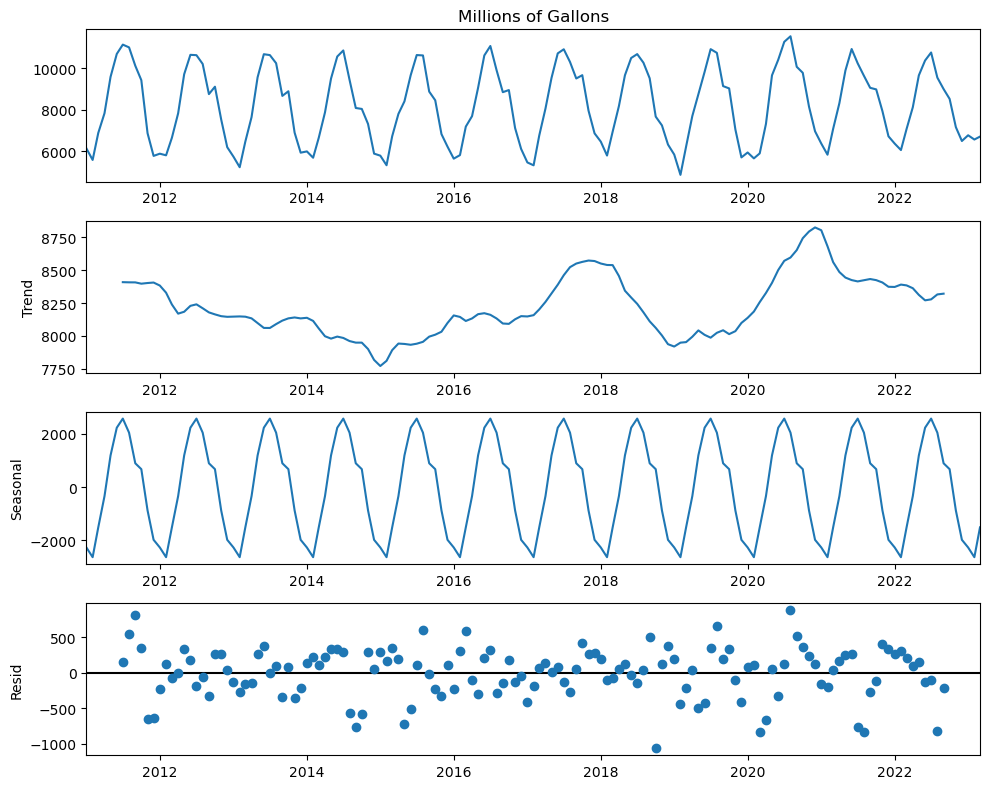

In [138]:

import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df['Millions of Gallons'],
                                model='additive')

resplot = res.plot()
     

In [173]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Millions of Gallons'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2334.953, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2626.685, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2456.739, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2484.082, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3075.503, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2399.966, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2374.515, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2416.025, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2380.745, Time=0.36 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2299.900, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2322.912, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2289.949, Time=0.60 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2

In [174]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(147, 1)
(117, 1) (30, 1)


In [175]:
from statsmodels.tsa.arima.model import ARIMA

In [176]:
model=ARIMA(train['Millions of Gallons'],order=(5,0,0))


C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [177]:
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Millions of Gallons   No. Observations:                  117
Model:                  ARIMA(5, 0, 0)   Log Likelihood                -904.641
Date:                 Thu, 27 Apr 2023   AIC                           1823.282
Time:                         15:18:14   BIC                           1842.618
Sample:                     01-01-2011   HQIC                          1831.132
                          - 09-01-2020                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8202.1093     69.875    117.383      0.000    8065.157    8339.061
ar.L1          0.6777      0.117      5.803      0.000       0.449       0.907
ar.L2          0.0169      0.142      0.119      0.905      -0.262       0.296
ar.L3          0.0085      0.137      0.062      0.950      -0.260       0.276
ar.L4         -0.2454      0.129     -1.906      0.057      -0.498       0.007
ar.L5         -0.2900      0.090     -3.216      0.001      -0.467      -0.113
sigma2      2.913e+05   4.28e+04      6.813      0.000    2.08e+05    3.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.42   Prob(JB):                         0.44
Heteroskedasticity (H):               0.88   Skew:                             0.21
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Year_Month_Day'>

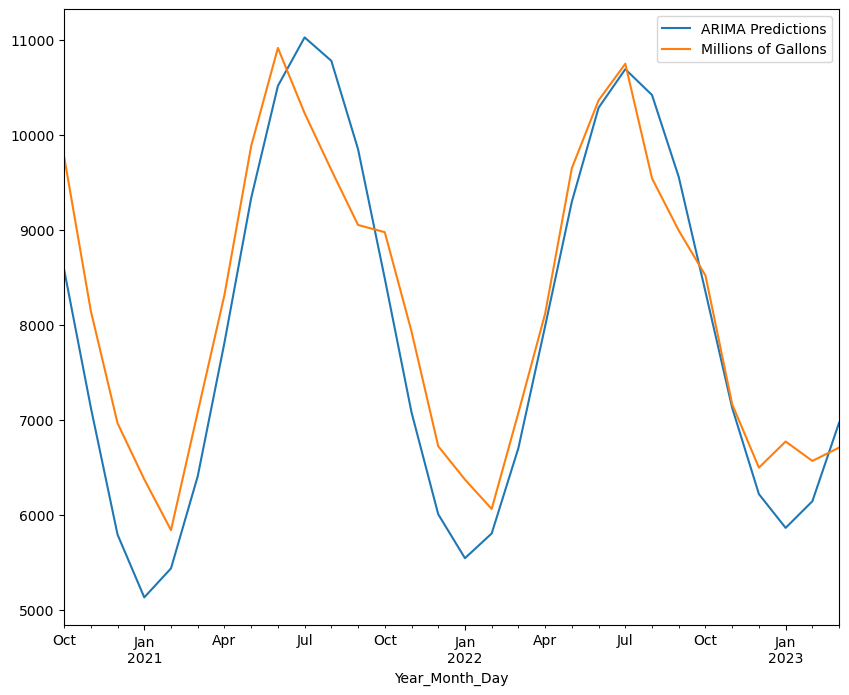

In [178]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Millions of Gallons'].plot(legend=True)

<Axes: xlabel='Year_Month_Day'>

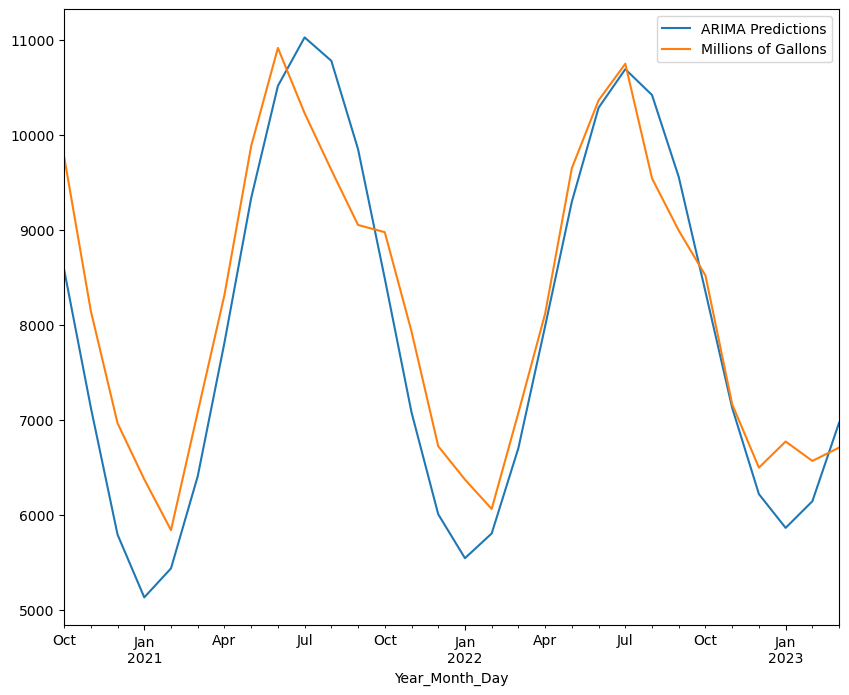

In [179]:
pred.plot(legend='ARIMA Predictions')
test['Millions of Gallons'].plot(legend=True)
     

In [180]:
test['Millions of Gallons'].mean()

8168.462

In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Millions of Gallons']))
print(rmse)

684.5960296135264


In [182]:
model2=ARIMA(df['Millions of Gallons'],order=(5,0,0))
model2=model2.fit()
df.tail()

C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\sweth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



,Millions of Gallons
Year_Month_Day,
2022-11-01,7166.50
2022-12-01,6500.82
2023-01-01,6775.50
2023-02-01,6571.18
2023-03-01,6711.57


In [183]:

index_future_dates=pd.date_range(start='2023-03-30',periods=12 ,freq='MS' ,inclusive="both" )
print(index_future_dates)


DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', freq='MS')


In [184]:
pred=model.predict(start=len(df),end=len(df)+11,type='levels').rename('ARIMA Predictions')
#print(comp_pred)


In [185]:
pred.index=index_future_dates
print(pred)

2023-04-01     8112.311312
2023-05-01     9250.387508
2023-06-01    10082.101525
2023-07-01    10390.593087
2023-08-01    10104.294918
2023-09-01     9313.019333
2023-10-01     8240.345022
2023-11-01     7180.629275
2023-12-01     6418.367238
2024-01-01     6151.959427
2024-02-01     6442.259773
2024-03-01     7199.198163
Freq: MS, Name: ARIMA Predictions, dtype: float64


<Axes: >

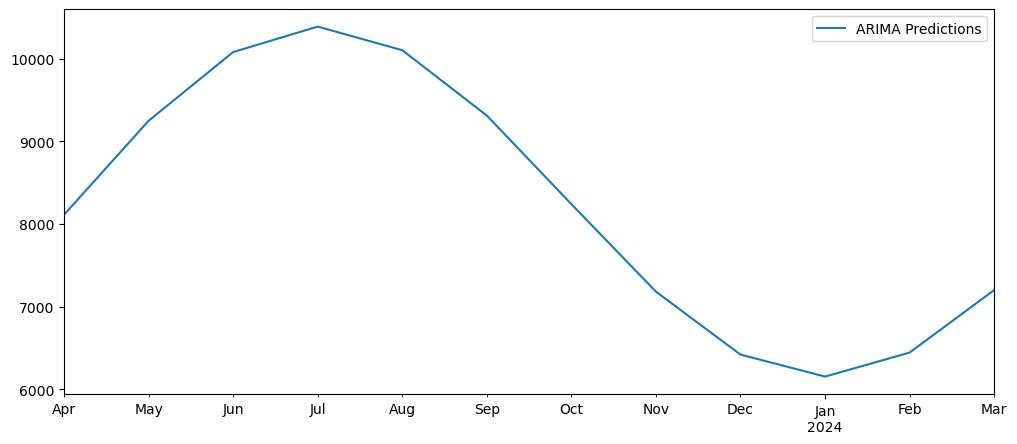

In [186]:
pred.plot(figsize=(12,5),legend=True)